# Monthly Potential Photovoltaic Output Data Across US From Global Solar Atlas

In [16]:
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
import numpy as np
import rasterio

*Importing `rasterio` library for visualizing the .tif files*

### Basic Visualizations

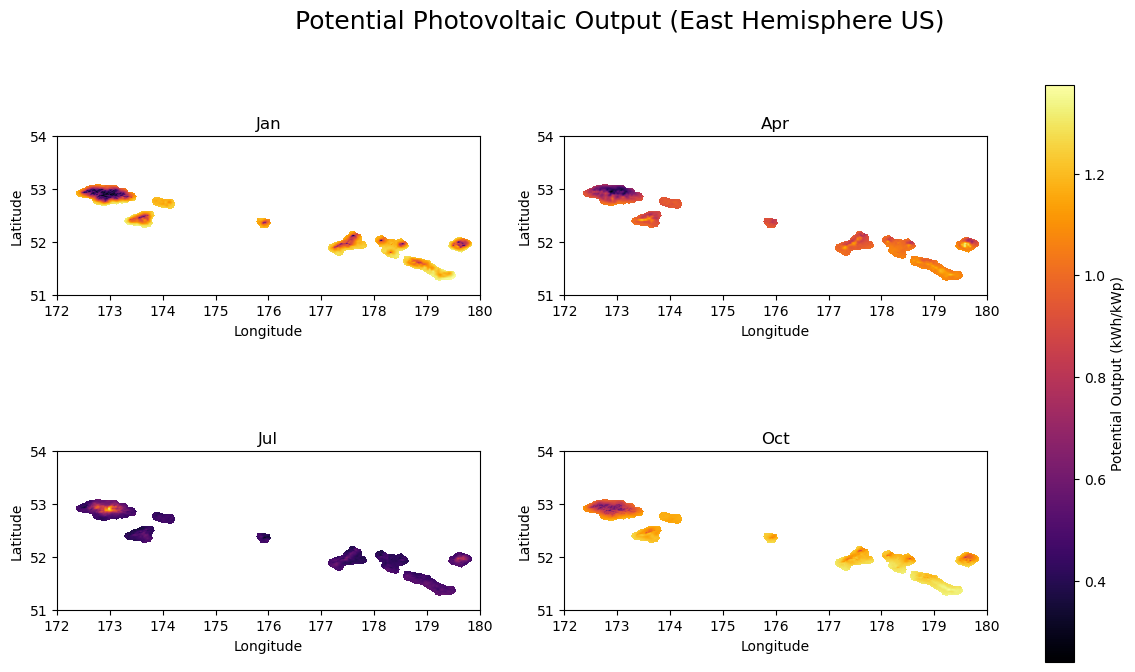

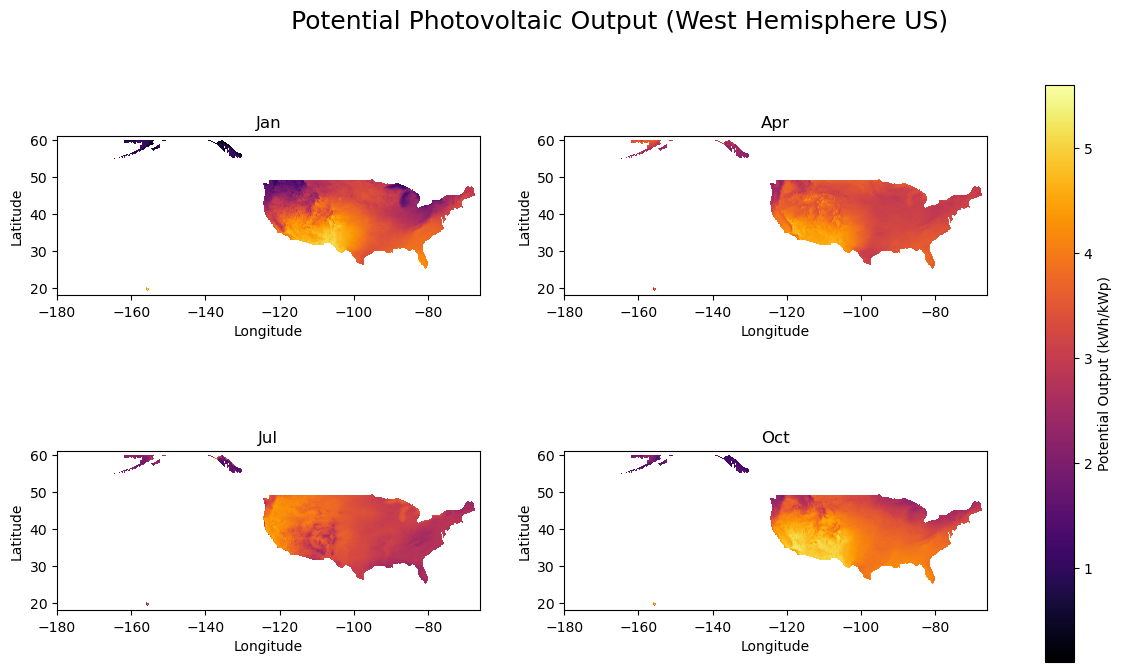

In [ ]:
months = ["Jan", "Apr", "Jul", "Oct"]
month_idx = ["1", "4", "7", "10"]

# Reading and processing the .tif files
pvo_ds_est = {}
pvo_ds_wst = {}
for i in range(4):
    tif_file = None
    
    # Determining the .tif file paths
    if i < 3:
        tif_file_est = f"../Data/gsa/easthem-monthly/PVOUT_0{month_idx[i]}.tif"
        tif_file_wst = f"../Data/gsa/westhem-monthly/PVOUT_0{month_idx[i]}.tif"
    else:
        tif_file_est = f"../Data/gsa/easthem-monthly/PVOUT_{month_idx[i]}.tif"
        tif_file_wst = f"../Data/gsa/westhem-monthly/PVOUT_{month_idx[i]}.tif"
    
    # Reading the .tif files
    with rasterio.open(tif_file_est) as dataset:
        pvo_data = dataset.read(1)  # Reading the first band
        extent = plotting_extent(dataset)
        pvo_ds_est[months[i]] = [pvo_data, extent]
    with rasterio.open(tif_file_wst) as dataset:
        pvo_data = dataset.read(1)  # Reading the first band
        extent = plotting_extent(dataset)
        pvo_ds_wst[months[i]] = [pvo_data, extent]

# Visualizing the 
fig1, ax1 = plt.subplots(2, 2, figsize = (15, 7.5))
fig2, ax2 = plt.subplots(2, 2, figsize = (15, 7.5))
for i in range(4):
    ax1[i // 2, i % 2].imshow(pvo_ds_est[months[i]][0], extent = pvo_ds_est[months[i]][1], cmap = "inferno")
    ax1[i // 2, i % 2].set_title(months[i])
    ax1[i // 2, i % 2].set_xlabel("Longitude")
    ax1[i // 2, i % 2].set_ylabel("Latitude")
    ax2[i // 2, i % 2].imshow(pvo_ds_wst[months[i]][0], extent = pvo_ds_wst[months[i]][1], cmap = "inferno")
    ax2[i // 2, i % 2].set_title(months[i])
    ax2[i // 2, i % 2].set_xlabel("Longitude")
    ax2[i // 2, i % 2].set_ylabel("Latitude")
fig1.colorbar(ax1[0, 0].images[0], ax=ax1.ravel().tolist(), label="Potential Output (kWh/kWp)")
fig2.colorbar(ax2[0, 0].images[0], ax=ax2.ravel().tolist(), label="Potential Output (kWh/kWp)")
fig1.suptitle("Potential Photovoltaic Output (East Hemisphere US)", fontsize = 18)
fig2.suptitle("Potential Photovoltaic Output (West Hemisphere US)", fontsize = 18)
plt.show()


### General Data Info

In [18]:
# Displaying some general data info
print("Dataset Info:\n----------\n")
with rasterio.open(tif_file_est) as dataset:
    print("Eastern Hemisphere in Oct.")
    print("Width, Height:", dataset.width, dataset.height)
    print("Number of bands:", dataset.count)
    print(f"Resolution (deg/pixel): [{round(dataset.res[0], 5)}, {round(dataset.res[0], 5)}] (30-arc secs., ~ 1km)")
    data = dataset.read(1)
    print("\nData Stats (kWh/kWp):")
    print("Min:", np.nanmin(data))
    print("Max:", np.nanmax(data))
    print("Mean:", np.nanmean(data))
    print("Standard deviation:", np.nanstd(data))
print("----------\n")
with rasterio.open(tif_file_wst) as dataset:
    print("Western Hemisphere in Oct.")
    print("Width, Height:", dataset.width, dataset.height)
    print("Number of bands:", dataset.count)
    print(f"Resolution (deg/pixel): [{round(dataset.res[0], 5)}, {round(dataset.res[0], 5)}] (30-arc secs., ~ 1km)")
    data = dataset.read(1)
    print("\nData Stats (kWh/kWp):")
    print("Min:", np.nanmin(data))
    print("Max:", np.nanmax(data))
    print("Mean:", np.nanmean(data))
    print("Standard deviation:", np.nanstd(data))

print("\n", data.shape)

Dataset Info:
----------

Eastern Hemisphere in Oct.
Width, Height: 960 360
Number of bands: 1
Resolution (deg/pixel): [0.00833, 0.00833] (30-arc secs., ~ 1km)

Data Stats (kWh/kWp):
Min: 0.576
Max: 2.435
Mean: 2.0634089
Standard deviation: 0.26054806
----------

Western Hemisphere in Oct.
Width, Height: 13680 5160
Number of bands: 1
Resolution (deg/pixel): [0.00833, 0.00833] (30-arc secs., ~ 1km)

Data Stats (kWh/kWp):
Min: 0.287
Max: 6.037
Mean: 4.0144734
Standard deviation: 0.87507

 (5160, 13680)


### Data Summary

A grid (raster) of potential photovoltaic output values (in kWh/kwP - kilowatt-hours per kilowatt-peak) for the eastern and western hemispheres of the US.  Each PVO value is the longterm-monthly average PVO from 1999-2018.  The resolution of this data is approximately 1 PVO value for every 1km $^2$ (30-arc secs. $\times$ 30-arc secs.).

### Data Source

Data downloaded from [Global Solar Atlas](https://globalsolaratlas.info/download/usa)

* The World Bank Group, ESMAP, & Solargis. (2019). Global Solar Atlas 2.0: LTAy_AvgDailyTotals (GeoTIFF) - USA solar resource data. Retrieved from https://globalsolaratlas.info/download/usa